In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
VGgameDF = pd.read_csv('vgsales.csv')

In [3]:
VGgameDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### 데이터 전처리 - 결측치 제거

In [4]:
VGgameDF = VGgameDF.iloc[:,[2,4,5,6,7,8,10]]

In [5]:
VGgameDF.isnull().sum()

Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Global_Sales     0
dtype: int64

In [6]:
len(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list())

58

In [7]:
VGgameDF.drop(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list(), inplace=True)
VGgameDF.drop(VGgameDF[VGgameDF['Publisher']=='Unknown'].index.to_list(), inplace=True)

C:\Users\kjy19\AppData\Local\Temp\ipykernel_27944\1161423503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF.drop(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list(), inplace=True)
C:\Users\kjy19\AppData\Local\Temp\ipykernel_27944\1161423503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF.drop(VGgameDF[VGgameDF['Publisher']=='Unknown'].index.to_list(), inplace=True)


In [8]:
VGgameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [9]:
for c in VGgameDF.columns[:2]:
    print(VGgameDF[c].unique())
    print()

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']



In [10]:
VGgameDF['Publisher'].isin(['Nintendo']).sum()  # isin 확인용

703

#### 데이터 전처리 - 플랫폼 확인

In [11]:
print(len(VGgameDF['Platform'].unique()))   # 플랫폼 갯수 31개
(VGgameDF['Platform'].value_counts()> 10).value_counts()    # n개 이상의 게임을 배급한 플랫폼 의 수 식별

31


count
True     25
False     6
Name: count, dtype: int64

In [12]:
VGgameDF['Platform'].value_counts().index


Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600',
       'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG',
       'PCFX'],
      dtype='object', name='Platform')

Text(0.5, 1.0, '플랫폼 별 배급된 게임 수')

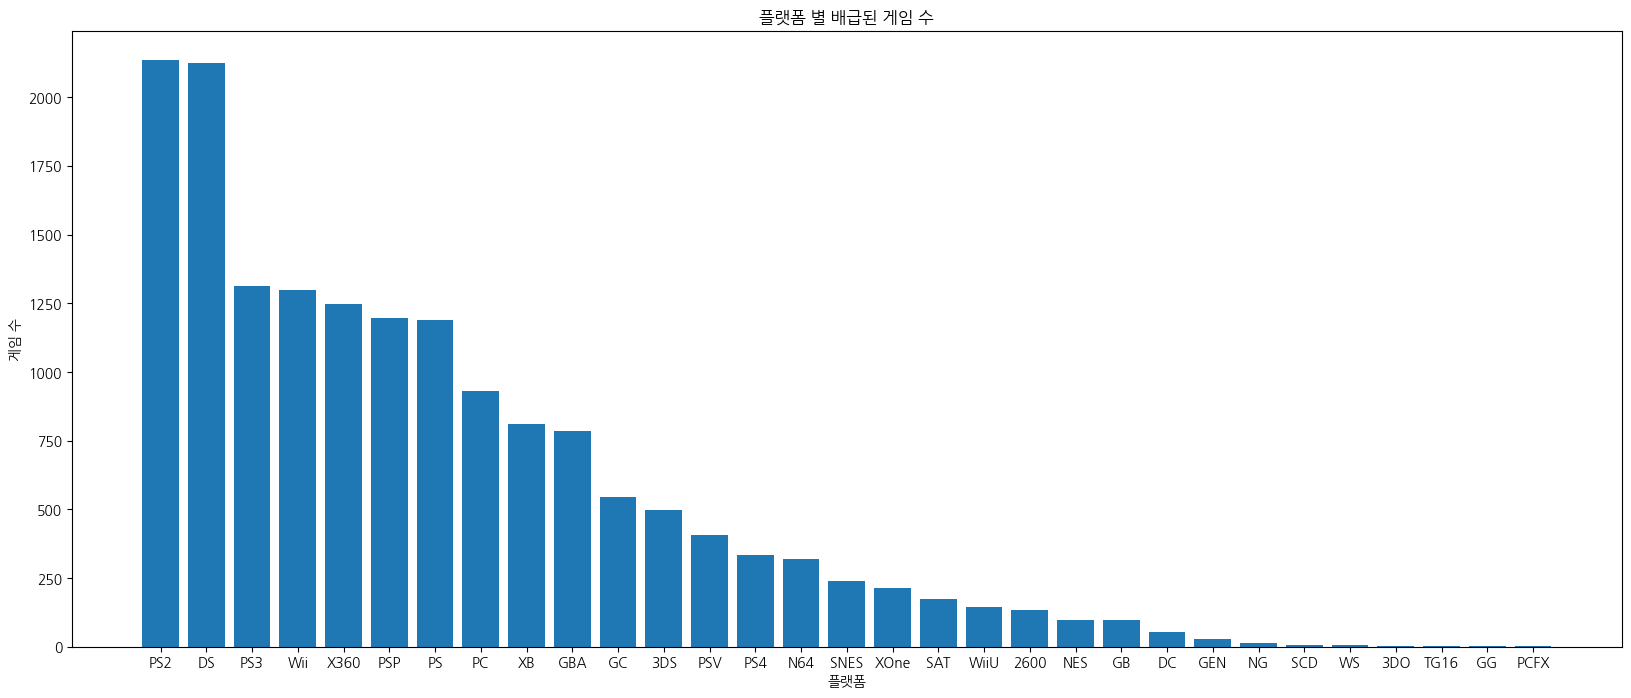

In [13]:
plt.figure(figsize=(20,8))
plt.bar(VGgameDF['Platform'].value_counts().index,VGgameDF['Platform'].value_counts())
plt.xlabel('플랫폼')
plt.ylabel('게임 수')
plt.title('플랫폼 별 배급된 게임 수')


In [14]:
VGgameDF['Platform'].value_counts() 

Platform
PS2     2135
DS      2123
PS3     1311
Wii     1298
X360    1249
PSP     1198
PS      1189
PC       932
XB       812
GBA      785
GC       544
3DS      498
PSV      405
PS4      335
N64      318
SNES     239
XOne     212
SAT      173
WiiU     143
2600     132
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [15]:
a = pd.DataFrame((VGgameDF['Platform'].value_counts() > 200)==True)
Platform_list = a[a['count']==True].index.to_list()

In [16]:
tempDF = VGgameDF[VGgameDF['Platform'].isin(Platform_list)]
tempDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
6,DS,Platform,Nintendo,11.38,9.23,6.50,30.01
7,Wii,Misc,Nintendo,14.03,9.20,2.93,29.02
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [17]:
len(Platform_list)

17

#### 데이터 전처리 - 배급처 확인

In [18]:
tempDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
6,DS,Platform,Nintendo,11.38,9.23,6.50,30.01
7,Wii,Misc,Nintendo,14.03,9.20,2.93,29.02
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [19]:
len(tempDF['Platform'].unique())
# tempDF['Publisher'].unique()

17

In [20]:
# tempDF['Platform'].value_counts() > 15

(tempDF['Publisher'].value_counts()> 15).value_counts()

count
False    428
True     108
Name: count, dtype: int64

In [21]:
temp = pd.DataFrame((tempDF['Publisher'].value_counts() > 15))
Up_Pub_list = temp[temp['count']==True].index.to_list()

In [22]:
len(Up_Pub_list)
# Up_Pub_list
# 

108

In [23]:
GameDF = tempDF[tempDF['Publisher'].isin(Up_Pub_list)]

In [24]:
VGgameDF['Publisher'].value_counts() 
# VGgameDF['Publisher'][VGgameDF['Publisher']=='Nintendo'].count()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 577, dtype: int64

#### Decision Tree

In [25]:
GameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
6,DS,Platform,Nintendo,11.38,9.23,6.50,30.01
7,Wii,Misc,Nintendo,14.03,9.20,2.93,29.02
...,...,...,...,...,...,...,...
16591,PC,Adventure,Ubisoft,0.01,0.00,0.00,0.01
16592,DS,Simulation,Destineer,0.01,0.00,0.00,0.01
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01


In [26]:
# 모듈로딩
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [27]:
targetDF = GameDF['Publisher']
featureDF = (GameDF.iloc[:,[0,1,3,4,5,6]])

In [28]:
lencoder = LabelEncoder()
lencoder.fit(targetDF)
lencoder.transform(targetDF)
targetSR = np.array(targetDF)

In [43]:
type(targetSR)

numpy.ndarray

##### 플랫폼, 장르 원핫

In [30]:
ohEncoder = OneHotEncoder()

In [31]:
featureDF = pd.get_dummies(featureDF)

In [32]:
# pla = np.array(featureDF['Platform']).reshape(-1,1)
# gen = np.array(featureDF['Genre']).reshape(-1,1)

# ohEncoder.fit(pla)
# ohEncoder.fit(gen)

# ohEncoder.transform(pla)
# ohEncoder.transform(gen)

In [33]:
featureDF

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_N64,Platform_PC,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,41.49,29.02,3.77,82.74,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,15.85,12.88,3.79,35.82,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,15.75,11.01,3.28,33.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,11.38,9.23,6.50,30.01,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,14.03,9.20,2.93,29.02,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,0.01,0.00,0.00,0.01,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
16592,0.01,0.00,0.00,0.01,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16593,0.01,0.00,0.00,0.01,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
16594,0.01,0.00,0.00,0.01,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [34]:
print(f'featureDF - shape : {featureDF.shape}, ndim : {featureDF.ndim}')
print(f'targetDF - shape : {targetSR.shape}, ndim : {targetSR.ndim}')

featureDF - shape : (14014, 33), ndim : 2
targetDF - shape : (14014,), ndim : 1


In [35]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

In [36]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [37]:
# print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}')
print(f'[dt_model.max_features] {dt_model.max_features_}')
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.n_classes_] 108
[dt_model.max_features] 33
[dt_model.feature_names_in_] ['NA_Sales' 'EU_Sales' 'JP_Sales' 'Global_Sales' 'Platform_3DS'
 'Platform_DS' 'Platform_GBA' 'Platform_GC' 'Platform_N64' 'Platform_PC'
 'Platform_PS' 'Platform_PS2' 'Platform_PS3' 'Platform_PS4' 'Platform_PSP'
 'Platform_PSV' 'Platform_SNES' 'Platform_Wii' 'Platform_X360'
 'Platform_XB' 'Platform_XOne' 'Genre_Action' 'Genre_Adventure'
 'Genre_Fighting' 'Genre_Misc' 'Genre_Platform' 'Genre_Puzzle'
 'Genre_Racing' 'Genre_Role-Playing' 'Genre_Shooter' 'Genre_Simulation'
 'Genre_Sports' 'Genre_Strategy']
[dt_model.feature_importances_] [0.18570055 0.14537239 0.08729787 0.25276618 0.01077758 0.02014829
 0.00738512 0.00953412 0.00859635 0.0050123  0.01014449 0.01203501
 0.0192226  0.00801928 0.01753947 0.00779207 0.00298156 0.01830223
 0.02044185 0.01128616 0.00577786 0.01564932 0.00999816 0.01026107
 0.01176003 0.00787068 0.00740969 0.00855292 0.01235539 0.01274123
 0.00911381 0.01928856 0.0088658 ]


In [38]:
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)
print(f'train_score : test_score = {train_score:.4f} : {test_score:.4f}')

train_score : test_score = 0.8267 : 0.1807


###### 트리 그림

In [39]:
params = {'max_depth':[6,5,4,3],
       'min_samples_leaf' : [5,3,2]}

gscv=GridSearchCV(DecisionTreeClassifier(), 
                  param_grid=params, 
                  refit=True, 
                  return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 5, 4, 3],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [40]:
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_] {gscv.cv_results_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

best_model = gscv.best_estimator_
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

[gscv.best_params_] {'max_depth': 6, 'min_samples_leaf': 2}
[gscv.best_score_] 0.20789724072312085
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)
[best_model.max_depth] : 6
[best_model.min_samples_leaf] : 2


In [41]:
from sklearn.tree import export_graphviz
export_graphviz(best_model, out_file = 'tree.dot',
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

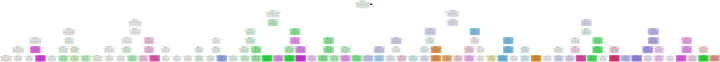

In [42]:
import graphviz
import pydotplus
with open('tree.dot') as f:
    dot_data = f.read()
pydot_graph= graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph


# graph_attr(size="8,8")
# graph